In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import japanize_matplotlib
from causalnex.structure.notears import from_pandas
from sklearn.preprocessing import StandardScaler

In [33]:
def del_city(df, city=None):
    df = df[df["地域"] != city]
    return df

def scaler(x):
    return (2 / (1 + math.exp(-2*x))) - 1

def apply_std(df):
    scaler = StandardScaler()
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_std.round(3)

def structure_learning(df, threshold=None, max_iter=None):
    # input_tr = df.applymap(scaler)
    input_tr = apply_std(df)
    return from_pandas(input_tr, w_threshold=threshold, max_iter=max_iter)

def make_color_list(dag, target_node):
    if target_node not in dag.nodes:
        raise ValueError(f"target_node {target_node} is not in the graph")
    
    incoming_edges = dag.in_edges(target_node)
    source_nodes = [edge[0] for edge in incoming_edges]
    print(f"source_nodes: {source_nodes}")
    
    node_color = []
    edge_color = []
    for node in dag.nodes:
        if node == target_node:
            node_color.append("red")
        elif node in source_nodes:
            node_color.append("blue")
        else:
            node_color.append("gray")
            
    for edge in dag.edges:
        if edge in incoming_edges:
            edge_color.append("blue")
        else:
            edge_color.append("black")
            
    return node_color, edge_color
    

def plot_struct(dag, node_color, edge_color, title, figsize=(15, 15)):
    pos = nx.circular_layout(dag)
    plt.figure(figsize=figsize)
    nx.draw(dag, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color,font_family="Osaka")
    plt.title(title)
    plt.show()

In [34]:
df = pd.read_csv("/Users/itsukikuwahara/Desktop/codes/research/data/data_pref/df.csv")
df_cr = pd.read_csv("/Users/itsukikuwahara/Desktop/codes/research/data/data_pref/df_cr.csv")

In [35]:
feature = ['若年人口','E8102_在学者1人当たり学校教育費（小学校）【円】', 'C5109_消費者物価指数・保健医療【‐】',
       'C5111_消費者物価指数・教育【‐】', 'E8103_在学者1人当たり学校教育費（中学校）【円】',
       'B120101_評価総地積（田）【ｍ2】', 'E8101_在学者1人当たり学校教育費（幼稚園）【円】',
       'C5107_消費者物価指数・家具・家事用品【‐】', 'D310312_災害復旧費（都道府県財政）【千円】',
       'D2101_財政力指数（都道府県財政）【‐】', 'C5112_消費者物価指数・教養娯楽【‐】',
       'C5110_消費者物価指数・交通・通信【‐】', 'B2104_国立公園面積【ｈａ】',
       'E8104_在学者1人当たり学校教育費（高等学校・全日制）【円】', 'E460402_高等学校卒業者のうち就職者数（女）【人】',
       'C5102_消費者物価指数・帰属家賃を除く総合【‐】', 'B1201_評価総地積（課税対象土地）【ｍ2】',
       'E6302_大学学生数【人】', 'E630201_大学学生数（男）【人】', 'E1301_幼稚園教員数【人】',
       'D3103085_都市計画費（都道府県財政）【千円】', 'D320406_普通建設事業費（市町村財政）【千円】',
       'B1101_総面積（北方地域及び竹島を除く）【ｈａ】', 'E210103_小学校数（私立）【校】',
       'C5103_消費者物価指数・生鮮食品を除く総合（持家の帰属家賃を含む）【‐】',
       'E470201_当該県の高校出身者で当該県の大学入学者数【人】', 'D3203102_小学校費（市町村財政）【千円】',
       'D310105_分担金及び負担金（都道府県財政）【千円】', 'E610203_大学数（私立）【校】',
       'D3105_地方債現在高（都道府県財政）【千円】', 'E410202_高等学校数（定時制）【校】', 'B2101_自然公園面積【ｈａ】',
       'C3801_旅館営業施設数（ホテルを含む）【施設】', 'E620201_大学教員数（男）【人】',
       'E460101_高等学校卒業者数（男）【人】', 'E6202_大学教員数【人】', 'E630102_短期大学学生数（女）【人】',
       'D310313_公債費（都道府県財政）（目的別歳出内訳）【千円】', 'C5101_消費者物価指数・総合（持家の帰属家賃を含む）【‐】',
       'B1108_自然環境保全地域面積【ｈａ】', 'C5106_消費者物価指数・光熱・水道【‐】',
       'B120102_評価総地積（畑）【ｍ2】', 'D410202_目的税（市町村税）【千円】',
       'D3203085_都市計画費（市町村財政）【千円】', 'C5113_消費者物価指数・諸雑費【‐】',
       'D3103032_老人福祉費（都道府県財政）【千円】', 'D320307_商工費（市町村財政）【千円】',
       'I5211_病院病床数【床】', 'D320113_国庫支出金（市町村財政）【千円】', 'J2509_児童館数【所】',
       'D3103045_清掃費（都道府県財政）【千円】']


In [36]:
temp = df[feature]

sl = structure_learning(temp,threshold=0.5, max_iter=20000)

/Users/itsukikuwahara/Desktop/codes/research/struct_analysis/.venv/lib/python3.10/site-packages/causalnex/structure/notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [37]:
pd.DataFrame(StandardScaler().fit_transform(temp), columns=temp.columns)

,若年人口,E8102_在学者1人当たり学校教育費（小学校）【円】,C5109_消費者物価指数・保健医療【‐】,C5111_消費者物価指数・教育【‐】,E8103_在学者1人当たり学校教育費（中学校）【円】,B120101_評価総地積（田）【ｍ2】,E8101_在学者1人当たり学校教育費（幼稚園）【円】,C5107_消費者物価指数・家具・家事用品【‐】,D310312_災害復旧費（都道府県財政）【千円】,D2101_財政力指数（都道府県財政）【‐】,...,B120102_評価総地積（畑）【ｍ2】,D410202_目的税（市町村税）【千円】,D3203085_都市計画費（市町村財政）【千円】,C5113_消費者物価指数・諸雑費【‐】,D3103032_老人福祉費（都道府県財政）【千円】,D320307_商工費（市町村財政）【千円】,I5211_病院病床数【床】,D320113_国庫支出金（市町村財政）【千円】,J2509_児童館数【所】,D3103045_清掃費（都道府県財政）【千円】
0,1.594131,-1.597869,-2.558351,-2.060369,-1.536067,4.439040,-1.015370,-0.861978,2.666774,-0.112604,...,5.616154,-0.388957,-0.271347,-3.002536,-0.481477,-0.134663,1.485992,0.526514,0.949646,-0.137687
1,-0.314494,-1.663134,-2.406091,-2.275411,-1.766276,0.566150,-1.606891,-0.071531,1.296730,-0.958296,...,0.198789,-0.606522,-0.708890,-2.959058,-0.692057,-0.730823,-0.547695,-0.624050,0.650243,-0.137930
2,-0.397357,-1.485128,-2.398841,-1.967606,-1.648781,0.613119,-1.481281,-1.171025,-0.616555,-0.976610,...,0.267799,-0.600215,-0.717536,-2.661954,-0.690960,-0.738313,-0.619155,-0.753551,0.281748,-0.137930
3,-0.083734,-1.677746,-2.137825,-2.094101,-1.752729,1.036930,-1.440140,-1.129422,-0.529143,0.121154,...,-0.110070,-0.528295,-0.654334,-3.038768,-0.681763,-0.709463,-0.481090,-0.677219,-0.259480,-0.137231
4,-0.487717,-1.515607,-2.297334,-2.186864,-1.630115,1.352909,-1.623971,-1.699971,0.479813,-0.978699,...,-0.217887,-0.611879,-0.724404,-2.567750,-0.709670,-0.716474,-0.696471,-0.776861,0.120531,-0.133266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.475495,0.874135,1.088624,1.144170,0.975094,0.223407,2.358716,-1.979302,-0.164713,-0.346230,...,0.038007,-0.371346,-0.358901,1.062714,0.697277,-0.357858,0.113497,-0.031438,-0.374635,-0.137930
1594,-0.675271,1.250287,1.030621,1.182118,1.551610,-0.341785,1.584438,-1.747516,-0.464352,-0.445930,...,-0.213217,-0.281763,-0.511771,1.004742,0.199639,-0.368451,-0.441728,-0.309454,-0.420697,-0.137930
1595,-0.689662,0.480045,0.994368,1.177902,1.037494,-0.491457,0.980728,-1.426583,-0.316009,-0.715248,...,-0.128443,-0.477215,-0.495140,0.772856,0.097955,-0.471100,-0.470601,-0.275976,-0.098264,-0.124120
1596,-0.517820,1.071586,0.863860,1.169469,1.045631,-0.304563,0.453474,-1.379037,-0.607859,-0.714848,...,0.478239,-0.303810,-0.353106,1.048221,0.808820,-0.482088,0.095336,0.201691,-0.489790,-0.103067


source_nodes: ['E610203_大学数（私立）【校】', 'E6202_大学教員数【人】']


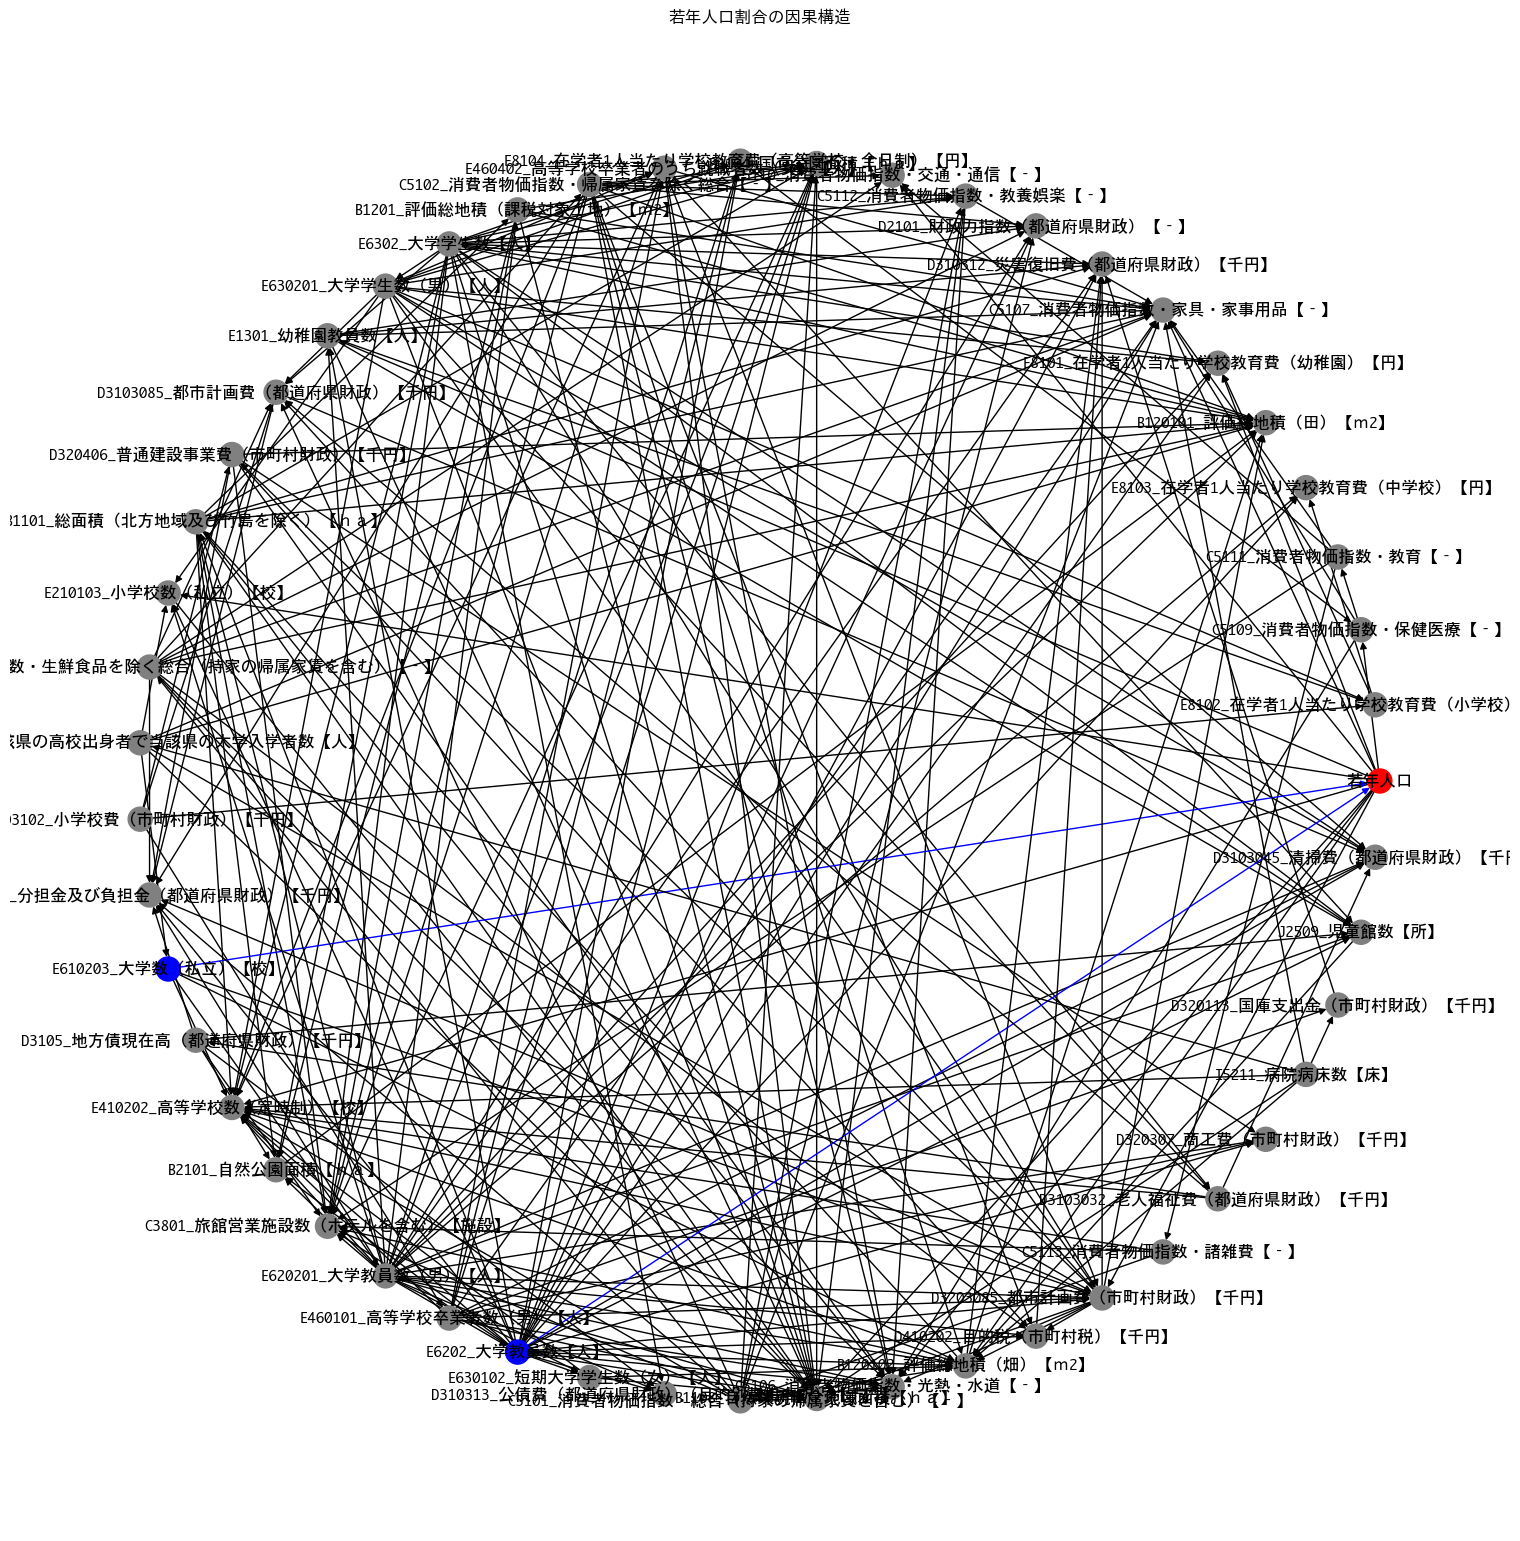

In [38]:
node_colors, edge_colors = make_color_list(sl, target_node="若年人口")
plot_struct(sl, node_colors, edge_colors, "若年人口割合の因果構造")